In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import torch
import torch.nn as nn


from pathlib import Path
import os
from classes import *

In [36]:
loaddata = LoadData()


In [37]:

file = str(Path('FA_20240517_2H_yeast_Nicotinamide-d4 _9.csv'))
substrates = loaddata.get_substrate_list(file)
metabolites = loaddata.get_metabolite_list(file)
df_list = loaddata.load_data(file)

In [38]:

# convert each element of substrates to float
substrates = [float(i) for i in substrates]
metabolites = [float(i) for i in metabolites]
substrates, metabolites


([9.094, 8.876, 8.42, 7.772, 4.7], [9.031, 8.714, 8.376, 7.659])

In [ ]:
from scipy.ndimage import gaussian_filter1d


def fill_df(df, column):
    """If Data is not ranging from -2 to 10, fill the data with noise
    
    """
    # renmame the columns
    df.columns = ['x', column]
    x = df.loc[:, 'x']
    y = df.loc[:, column]



    # Calculate the step size of the x values
    x_diff = np.diff(x)
    step = np.mean(x_diff)
    
    # Take sample range for the noise
    x_range_lower = 20
    x_range_upper = 100

    # get sample data of the noise
    x_sample = x[x_range_lower:x_range_upper]
    y_sample = y[x_range_lower:x_range_upper]

    # get the max and min values of the sample data
    y_min, y_max = y_sample.min(), abs(y_sample.min())

    # get the min max values of the x data
    x_min, x_max = x.min(), x.max()

    if x_min > -2:

        # create values in n steps
        x_new = np.arange(-2, x.iloc[0], step)
        y_new = np.zeros_like(x_new)

        # set the noise level
        noise = np.random.normal(y_min, y_max, len(x_new))
        
        # smooth the noise with gaussian filter
        # Berechne die Standardabweichung der y-Daten
        sigma = len(y_new) / 100
        noise = gaussian_filter1d(input=noise, sigma=sigma)

        # replace y_new with noise
        y_new = noise

        data = pd.DataFrame({'x': x_new, column: y_new})
        df = pd.concat([data, df], axis=0)
        df.reset_index(drop=True, inplace=True)

    if x_max < 15:
    
        # create values in n steps
        x_new = np.arange(x.iloc[-1], 13, step)
        #print(x_new)
        y_new = np.zeros_like(x_new)

        # set the noise level
        noise = np.random.normal(y_min, y_max, len(x_new))

        # smooth the noise with gaussian filter
        # Berechne die Standardabweichung der y-Daten
        sigma = len(y_new) / 100
        noise = gaussian_filter1d(input=noise, sigma=sigma)

        # replace y_new with noise
        y_new = noise

        data = pd.DataFrame({'x': x_new, column: y_new})
        df = pd.concat([df, data], axis=0)
        df.reset_index(drop=True, inplace=True)
    #display(df)
    return df

Expand the Dataframe from -2 to 10.

In [40]:
df = pd.read_csv(df_list[0])

df_merged = pd.DataFrame()
# Iterate over each column starting from the second column
for i in range(1, len(df.columns)):
    #print(df.columns[i], i)
    # Pass a subset to fill_df, without modifying df in the loop
    filled_df = fill_df(df.iloc[:, [0, i]], column=df.columns[i])
    df_merged['x'] = filled_df['x']
    #display(filled_df)
    # Process filled_df if needed (e.g., store it in a list or combine with df)
    df_merged = pd.merge(df_merged, filled_df[df.columns[i]], left_index=True, right_index=True, how='outer')
display(df_merged)
print(df_merged.shape)

x  FA_20240517_2H_yeast_1.9.ser#1  \
0     -2.000000                    -3560.054850   
1     -1.991855                    -3571.834121   
2     -1.983710                    -3594.367267   
3     -1.975565                    -3626.038152   
4     -1.967420                    -3664.571609   
...         ...                             ...   
1839  12.967206                    -4665.257839   
1840  12.975351                    -4457.099400   
1841  12.983496                    -3924.072594   
1842  12.991641                    -3340.760520   
1843  12.999786                    -2974.380291   

      FA_20240517_2H_yeast_1.9.ser#2  FA_20240517_2H_yeast_1.9.ser#3  \
0                       -4302.512838                    -1963.600831   
1                       -4279.522935                    -1945.527985   
2                       -4234.618019                    -1911.575900   
3                       -4169.126967                    -1865.824234   
4                       -4086.052683                    -1812.935478   
...                              ...                             ...   
1839                    -3254.271831                    -1149.594433   
1840                    -3919.254875                    -1074.581856   
1841                    -4712.496181                    -1153.444115   
1842                    -5438.800914                    -1296.254502   
1843                    -5876.023099                    -1397.633377   

      FA_20240517_2H_yeast_1.9.ser#4  FA_20240517_2H_yeast_1.9.ser#5  \
0                       -1226.056022                    -1544.556029   
1                       -1237.743936                    -1541.184063   
2                       -1260.743344                    -1534.620884   
3                       -1294.165684                    -1525.363967   
4                       -1336.791853                    -1514.147529   
...                              ...                             ...   
1839                    -1919.645743                    -1176.604332   
1840                    -1600.579943                     -852.049995   
1841                    -1234.819877                     -631.758633   
1842                     -922.196690                     -523.804516   
1843                     -743.460530                     -489.145324   

      FA_20240517_2H_yeast_1.9.ser#6  FA_20240517_2H_yeast_1.9.ser#7  \
0                       -1940.197845                    -2159.547071   
1                       -1933.829287                    -2149.260720   
2                       -1922.994031                    -2128.894230   
3                       -1911.645681                    -2098.777839   
4                       -1904.708195                    -2059.789656   
...                              ...                             ...   
1839                    -1275.862279                    -1890.339632   
1840                    -1240.536820                    -1825.593711   
1841                    -1241.799331                    -1734.334165   
1842                    -1240.938224                    -1639.260918   
1843                    -1236.076626                    -1578.278429   

      FA_20240517_2H_yeast_1.9.ser#8  FA_20240517_2H_yeast_1.9.ser#9  ...  \
0                       -1652.804050                    -2128.383462  ...   
1                       -1643.262146                    -2111.866385  ...   
2                       -1624.943586                    -2079.868427  ...   
3                       -1599.336109                    -2034.451554  ...   
4                       -1568.458536                    -1978.137099  ...   
...                              ...                             ...  ...   
1839                    -1164.806643                    -1876.034857  ...   
1840                    -1384.333659                    -1860.518382  ...   
1841                    -1563.796023                    -1782.625523  ...   
1842                    -1671.067400

(1844, 51)


In [41]:
def get_pictrue(df):
    pic = df.iloc[:, 1:]
    return pic

pic = get_pictrue(df)

print(pic.shape)

x = df.iloc[:, 0]
print(x.shape)

(1063, 50)
(1063,)


In [42]:
import numpy as np
from scipy.ndimage import zoom

# Original array
# Target shape
target_shape = (1000, 50)


# Calculate scaling factors for each dimension
scale_factors = (target_shape[0] / pic.shape[0], target_shape[1] / pic.shape[1])

# Apply zoom with the calculated scale factors
upscaled_array = zoom(pic, scale_factors, order=3)


x_shape = (pic.shape[0], )
scale_factors_x = (target_shape[0] / x_shape[0], )
upscaled_x = zoom(x, scale_factors_x, order=3)


print(upscaled_array.shape)
print(upscaled_x.shape)


(1000, 50)
(1000,)


In [43]:
import plotly.express as px
y_labels = upscaled_x

def get_x_labels(column_list):
    x_labels = []
    for i in column_list:

        x_labels.append(i.split('#')[-1])
    return x_labels

x_labels = get_x_labels(df.columns[1:])
fig = px.imshow(upscaled_array, color_continuous_scale='thermal', aspect='auto', 
                y=y_labels,
                labels={'x':'Time [min]', 'y': 'Chemical Shift [ppm]', 'color': 'Intensity'},
                x=x_labels,
                )
# rotate x-axis labels
fig.update_xaxes(tickangle=0)
fig.show()

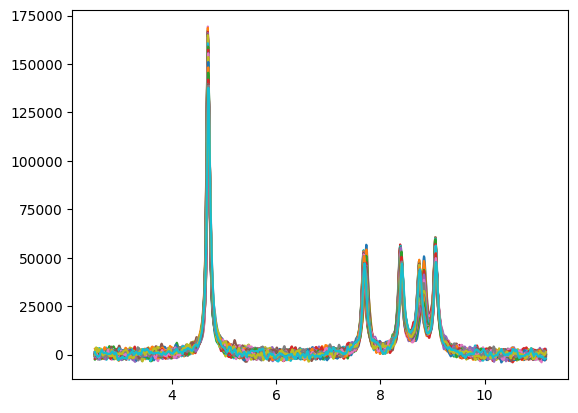

In [44]:
for i in range(1, len(df.columns)):
    plt.plot(df.iloc[:, 0], df.iloc[:, i], label=df.columns[i])

# Generate Synthetic Data

[9.094, 8.876, 8.42, 7.772, 4.7] [9.031, 8.714, 8.376, 7.659]


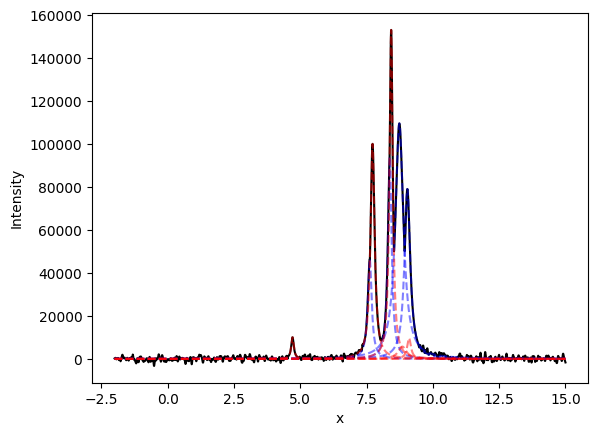

In [72]:
def lorentzian(x, x0, gamma, height):
    return height * gamma**2 / ((x - x0)**2 + gamma**2)

def generate_random_spectrum(substrates:list, metabolites:list, spectrum_length=3000):
    # Generate random spectrum with Lorentzian peaks
    x = np.linspace(-2, 15, spectrum_length)  # x range
    y = np.zeros_like(x)          # initialize y as zeros
    mask = np.zeros_like(x)       # mask to identify peak regions

    # Add random Lorentzian peaks
    x0_metabolite_parms = []
    gamma_metabolite_parms = []
    height_metabolite_parms = []

    x0_substrate_parms = []
    gamma_substrate_parms = []
    height_substrate_parms = []

    for peak_pos in metabolites:
        metabolism_x0 = peak_pos + np.random.uniform(-0.05, 0.05)
        
        metabolism_gamma = np.random.uniform(0.05, 0.2)  # Random width (gamma)
        metabolism_height = np.random.uniform(0, 175000)  # Random height
        peak_lorenz = lorentzian(x, metabolism_x0, metabolism_gamma, metabolism_height)
        y = np.maximum(y, peak_lorenz)  # Use maximum to avoid summing peaks

        # Create a mask to identify regions near the peaks (exclude noise here)
        mask += peak_lorenz > (0.1 * metabolism_height)  # Masking regions where peak height is significant

        # Append the parameters for the peak
        x0_metabolite_parms.append(metabolism_x0)
        gamma_metabolite_parms.append(metabolism_gamma)
        height_metabolite_parms.append(metabolism_height)

    for peak_pos in substrates:
        substrate_x0 = peak_pos + np.random.uniform(-0.05, 0.05)
        substrate_gamma = np.random.uniform(0.05, 0.2)
        substrate_height = np.random.uniform(0, 175000)
        peak_lorenz = lorentzian(x, substrate_x0, substrate_gamma, substrate_height)
        y = np.maximum(y, peak_lorenz)  # Use maximum to avoid summing peaks

        mask += peak_lorenz > (0.1 * substrate_height)  # Masking regions where peak height is significant

        # Append the parameters for the peak
        x0_substrate_parms.append(substrate_x0)
        gamma_substrate_parms.append(substrate_gamma)
        height_substrate_parms.append(substrate_height)

    # Add noise only outside the peak regions
    random_noise_level = np.random.uniform(100, spectrum_length)
    noise = np.random.normal(10, random_noise_level, spectrum_length)

    # smooth the noise with gaussian filter
    sigma = random_noise_level / 1000
    noise = gaussian_filter1d(noise, sigma=sigma)
        
    y_noisy = y + noise * (mask == 0)  # Add noise only where mask is 0 (outside peaks)

    data = {'metabolites': metabolites, 
                  'substrates': substrates,
                  'x': x,
                  'y_noisy': y_noisy,
                  'x0_metabolite_parms': x0_metabolite_parms,
                  'gamma_metabolite_parms': gamma_metabolite_parms,
                  'height_metabolite_parms': height_metabolite_parms,
                  'x0_substrate_parms': x0_substrate_parms,
                  'gamma_substrate_parms': gamma_substrate_parms,
                  'height_substrate_parms': height_substrate_parms}
    
    return data


# ----

#peak_list = [2.323, 4.7, 1.201]
spectrum_list = substrates + metabolites

data = generate_random_spectrum(metabolites=metabolites, substrates=substrates, spectrum_length=3000)
print(substrates, metabolites)

y_noisy = data['y_noisy']
x = data['x']

x0_metabolite_parms = data['x0_metabolite_parms']
gamma_metabolite_parms = data['gamma_metabolite_parms']
height_metabolite_parms = data['height_metabolite_parms']

x0_substrate_parms = data['x0_substrate_parms']
gamma_substrate_parms = data['gamma_substrate_parms']
height_substrate_parms = data['height_substrate_parms']

# Plot the result
plt.plot(x, y_noisy, '-', label="With Noise", color='black')

for x0, gamma, height in zip(x0_metabolite_parms, gamma_metabolite_parms, height_metabolite_parms):
    lorentz = lorentzian(x, x0, gamma, height)
    plt.plot(x, lorentz, '--', label="Metabolite Peak", alpha=0.5, color='blue')  

for x0, gamma, height in zip(x0_substrate_parms, gamma_substrate_parms, height_substrate_parms):
    #print(x0, gamma, height)
    lorentz = lorentzian(x, x0, gamma, height)
    plt.plot(x, lorentz, '--', label="Substrate Peak", alpha=0.5, color='red')

plt.xlabel('x')
plt.ylabel('Intensity')
# plt.legend()
plt.show()



In [87]:
# Generate 50 random spectra and put them in each column of a DataFrame
n_spectra = 51
spectrum_list = []
for i in range(n_spectra):
    data = generate_random_spectrum(metabolites=metabolites, substrates=substrates, spectrum_length=3000)
    spectrum_list.append(data['y_noisy'])

df = pd.DataFrame(spectrum_list).T
pic = get_pictrue(df)

# zoom x

x_shape = (pic.shape[0], )
scale_factors_x = (target_shape[0] / x_shape[0], )
upscaled_x = zoom(x, scale_factors_x, order=3)


# zoom the picture
target_shape = (1000, 50)
scale_factors = (target_shape[0] / pic.shape[0], target_shape[1] / pic.shape[1])
upscaled_array = zoom(pic, scale_factors, order=3)
print(x.shape)
print(upscaled_x.shape)

print(pic.shape)
print(upscaled_array.shape)

# show pic
fig = px.imshow(pic, color_continuous_scale='thermal', aspect='auto', y=x)

fig.show()

fig = px.imshow(upscaled_array, color_continuous_scale='thermal', aspect='auto', y=upscaled_x)
fig.show()

(3000,)
(1000,)
(3000, 50)
(1000, 50)
